# Practical Week 6: Multi-label Classification
In this practical you will practice with multi-label classification, in preparation for assignment 2.

In a multi-label classification task, the documents may have one or more labels (or sometimes none). An example of multi-label classification of images is to assign keywords to images. This blog post shows an example of multi-label text classification using scikit-learn. The post describes multiple methods you can use for the task. In this practical we will use the same data:

* [Multi-label Text Classification](https://towardsdatascience.com/multi-label-text-classification-5c505fdedca8)


The following code loads the [CMU Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/) and prepares it for use in the practical exercises. The corpus consists of movie plots and additional information, including the genre (or genres) of each movie. Your task will be to determine the genres of a movie, given the text of the movie plot. For this code to work, the following file must be in the same folder as this notebook:
* [MovieSummaries.zip](MovieSummaries.zip)

In [47]:
import pandas as pd
from zipfile import ZipFile
zip_file = ZipFile('MovieSummaries.zip')
metadata = pd.read_csv(zip_file.open('MovieSummaries/movie.metadata.tsv'), sep='\t', header=None)
metadata.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]
genres = metadata[["movie_id","movie_name","genre"]]
genres.head()

,movie_id,movie_name,genre
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


In [48]:
plots = pd.read_csv(zip_file.open('MovieSummaries/plot_summaries.txt'), sep='\t', header=None)
plots.columns = ["movie_id", "plot"]
plots.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [49]:
movies = pd.merge(plots, genres, on = 'movie_id')
movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [50]:
import json
genres_lists = []
for i in movies['genre']:
   genres_lists.append(list(json.loads(i).values()))
movies['genre'] = genres_lists
movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."


The following code uses scikit-learn's `MultiLabelBinarizer` to generate a column for each movie genre:

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit_transform(movies['genre'])
 # transform target variable
y = multilabel_binarizer.transform(movies['genre'])
for idx, genre in enumerate(multilabel_binarizer.classes_):
    movies[genre] = y[:,idx]
movies.head()

,movie_id,plot,movie_name,genre,Absurdism,Acid western,Action,Action Comedy,Action Thrillers,Action/Adventure,...,Werewolf fiction,Western,Whodunit,Women in prison films,Workplace Comedy,World History,World cinema,Wuxia,Z movie,Zombie Film
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr...",0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema...",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Finally, the following code uses scikit-learn to split the data into a train set, a dev-test set, and a development set.

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movies, random_state=42, test_size=0.30, shuffle=True)
train, devtest = train_test_split(train, random_state=42, test_size=0.30, shuffle=True)
print("Training size:", len(train))
print("Devtest size:", len(devtest))
print("Test size:", len(test))

Training size: 20679
Devtest size: 8863
Test size: 12662


In [53]:
train_texts = list(train['plot'])
train_labels = train.drop(labels=['movie_id', 'movie_name', 'plot', 'genre'], axis=1).to_numpy()

In [54]:
devtest_texts = list(devtest['plot'])
devtest_labels = devtest.drop(labels=['movie_id', 'movie_name', 'plot', 'genre'], axis=1).to_numpy()

In [55]:
test_texts = list(test['plot'])
test_labels = test.drop(labels=['movie_id', 'movie_name', 'plot', 'genre'], axis=1).to_numpy()

# Exercise: A Simple Classifier

Design a TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept the tf.idf encoding of the input text, using the top 8000 words. For this, you can use scikit-learn's `TfidfVectorizer` with the option `max_features=8000`.
2. An output layer with as many cells as possible movie genres (there are 363 distinct genres, can you find out how to calculate the number of distinct genres?).

Each output cell will act as a binary classifier, so the activation function should be `sigmoid`, and the loss function should be `binary_crossentropy`.

Train your neural model using the training set. Determine the optimal number of epochs by examining the accuracy results on the devtest set. The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 363)               2904363   
=================================================================
Total params: 2,904,363
Trainable params: 2,904,363
Non-trainable params: 0
```

In [62]:
# Write your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer

max_words = 8000
tfidf = TfidfVectorizer(input='contents', max_features=8000)
tfidf.fit(train_texts)
train_tfidf = tfidf.transform(train_texts).toarray()
devtest_tfidf = tfidf.transform(devtest_texts).toarray()
print('feature names: ', len(tfidf.get_feature_names()), 'shape: ', train_tfidf.shape)

model = Sequential()
model.add(Dense(363, activation='sigmoid', input_shape=(8000, )))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

feature names:  8000 shape:  (20679, 8000)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 363)               2904363   
Total params: 2,904,363
Trainable params: 2,904,363
Non-trainable params: 0
_________________________________________________________________


In [63]:
import numpy as np

history=model.fit(train_tfidf,
                      np.array(train_labels),
                      epochs=50,
                      batch_size=100,
                      validation_data=(devtest_tfidf, np.array(devtest_labels)))

Epoch 1/50
207/207 [==============================] - 5s 24ms/step - loss: 0.5382 - accuracy: 0.1556 - val_loss: 0.2532 - val_accuracy: 0.1688
Epoch 2/50
207/207 [==============================] - 4s 20ms/step - loss: 0.2103 - accuracy: 0.1769 - val_loss: 0.1136 - val_accuracy: 0.1688
Epoch 3/50
207/207 [==============================] - 4s 20ms/step - loss: 0.0995 - accuracy: 0.1726 - val_loss: 0.0677 - val_accuracy: 0.1697
Epoch 4/50
207/207 [==============================] - 4s 20ms/step - loss: 0.0627 - accuracy: 0.1693 - val_loss: 0.0512 - val_accuracy: 0.1712
Epoch 5/50
207/207 [==============================] - 4s 20ms/step - loss: 0.0485 - accuracy: 0.1769 - val_loss: 0.0443 - val_accuracy: 0.1749
Epoch 6/50
207/207 [==============================] - 4s 21ms/step - loss: 0.0426 - accuracy: 0.1836 - val_loss: 0.0410 - val_accuracy: 0.1818
Epoch 7/50
207/207 [==============================] - 4s 21ms/step - loss: 0.0394 - accuracy: 0.1920 - val_loss: 0.0391 - val_accuracy: 0.1891

In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

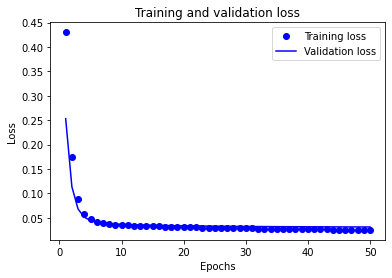

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Exercise: A Recurrent Neural Network

Implement a recurrent neural network that has the following sequence of layers:

1. An embedding layer that generates embedding vectors with 100 dimensions. Set the maximum input length to 100 words.
2. A LSTM layer that generates an output of 120 dimensions.
3. The final output layer that has the 363 cells with a sigmoid activation.

The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_4 (Embedding)      (None, 100, 100)          800000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense_7 (Dense)              (None, 363)               43923     
=================================================================
Total params: 950,003
Trainable params: 950,003
Non-trainable params: 0
```

For this exercise, use Keras' tokenizer with the option `num_words=8000` (so that you use the same vocabulary size as in the previous exercise).


In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
num_words = 8000
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(train_texts)

In [69]:
max_len = 100

training_sequences = tokenizer.texts_to_sequences(train_texts)
devtest_sequences = tokenizer.texts_to_sequences(devtest_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

training_vectors = pad_sequences(training_sequences, maxlen=max_len)
devtest_vectors = pad_sequences(devtest_sequences, maxlen=max_len)
test_vectors = pad_sequences(test_sequences, maxlen=max_len)

In [70]:
# Write your code here
from tensorflow. keras.layers import Embedding, LSTM

max_words = 8000
embedding_dim = 100
maxlen = 100

model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=maxlen))
model.add(LSTM(120))
model.add(Dense(363, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          800000    
_________________________________________________________________
lstm (LSTM)                  (None, 120)               106080    
_________________________________________________________________
dense_12 (Dense)             (None, 363)               43923     
Total params: 950,003
Trainable params: 950,003
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(training_vectors, 
                    np.array(train_labels),
                       epochs=50,
                       batch_size=100,
                       validation_data=(devtest_vectors, np.array(devtest_labels)))

Epoch 1/50
207/207 [==============================] - 17s 75ms/step - loss: 0.1326 - accuracy: 0.1475 - val_loss: 0.0375 - val_accuracy: 0.1688
Epoch 2/50
207/207 [==============================] - 14s 66ms/step - loss: 0.0373 - accuracy: 0.1727 - val_loss: 0.0374 - val_accuracy: 0.1688
Epoch 3/50
207/207 [==============================] - 14s 70ms/step - loss: 0.0372 - accuracy: 0.1699 - val_loss: 0.0374 - val_accuracy: 0.1688
Epoch 4/50
207/207 [==============================] - 14s 67ms/step - loss: 0.0371 - accuracy: 0.1724 - val_loss: 0.0372 - val_accuracy: 0.1688
Epoch 5/50
207/207 [==============================] - 13s 65ms/step - loss: 0.0368 - accuracy: 0.1783 - val_loss: 0.0371 - val_accuracy: 0.1692
Epoch 6/50
207/207 [==============================] - 13s 65ms/step - loss: 0.0363 - accuracy: 0.1746 - val_loss: 0.0363 - val_accuracy: 0.1896
Epoch 7/50
207/207 [==============================] - 13s 65ms/step - loss: 0.0389 - accuracy: 0.1830 - val_loss: 0.0363 - val_accuracy:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Optional Exercise: A More Complex Neural Network

Try to improve your classifiers by trying some of these options:

1. Use a different number of words, number of embeddings dimensions, etc.
2. Add hidden layers.
2. Stack LSTM layers (this may make the system much slower to train; use it only if your computer has a GPU).
3. Use pre-trained word embeddings.
4. Use BERT from the Huggingface `transformers` library https://github.com/huggingface/transformers (this may make the system much slower to train; use it only if your computer has a GPU).

In [ ]:
# Write your code here